<a href="https://colab.research.google.com/github/k-sharma01/LR_Practice_KNS/blob/main/LR_Practice.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# In-Class Assignment: Exploring Regression Techniques
Objective:
The goal of this assignment is to apply five regression techniques—Multiple Linear Regression (MLR), Stochastic Gradient Descent (SGD), Ridge Regression, Lasso Regression, and Polynomial Regression—on a from Kaggle. You will compare the performance of these models and interpret the results.
https://www.kaggle.com/datasets/CooperUnion/cardataset

### Import necessary libraries

In [23]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression, Ridge, Lasso, SGDRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import PolynomialFeatures

In [24]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [25]:
# Load a dataset
data = pd.read_csv('/content/drive/MyDrive/car_dataset.csv')

In [26]:
# Check data
data.sample(5)

,Make,Model,Year,Engine Fuel Type,Engine HP,Engine Cylinders,Transmission Type,Driven_Wheels,Number of Doors,Market Category,Vehicle Size,Vehicle Style,highway MPG,city mpg,Popularity,MSRP
4430,Chevrolet,Express,2014,flex-fuel (unleaded/E85),310.0,8.0,AUTOMATIC,all wheel drive,3.0,Flex Fuel,Midsize,Passenger Van,17,13,1385,34525
8479,Suzuki,Reno,2007,regular unleaded,127.0,4.0,AUTOMATIC,front wheel drive,4.0,Hatchback,Compact,4dr Hatchback,28,19,481,15199
5723,Toyota,Highlander Hybrid,2014,regular unleaded,280.0,6.0,AUTOMATIC,all wheel drive,4.0,"Crossover,Hybrid",Midsize,4dr SUV,28,27,2031,47300
10088,Pontiac,Sunfire,2003,regular unleaded,140.0,4.0,MANUAL,front wheel drive,2.0,NaN,Compact,Coupe,30,22,210,14930
3430,Dodge,Dakota,2008,regular unleaded,210.0,6.0,MANUAL,rear wheel drive,4.0,NaN,Compact,Extended Cab Pickup,20,16,1851,25395


## What are the basic properties of the dataset

- What is the shape of the dataset (number of rows and columns)?
- What are the column names, and what do they represent?
- What is the data type of each column?

In [27]:
data.shape

(11914, 16)

The above output tells us that the dataset has 11,914 rows with 16 columns.

In [28]:
data.columns

Index(['Make', 'Model', 'Year', 'Engine Fuel Type', 'Engine HP',
       'Engine Cylinders', 'Transmission Type', 'Driven_Wheels',
       'Number of Doors', 'Market Category', 'Vehicle Size', 'Vehicle Style',
       'highway MPG', 'city mpg', 'Popularity', 'MSRP'],
      dtype='object')

The above output lists the columns of the dataset, and they all seem to be relatively self-described.

In [29]:
data.dtypes

,0
Make,object
Model,object
Year,int64
Engine Fuel Type,object
Engine HP,float64
Engine Cylinders,float64
Transmission Type,object
Driven_Wheels,object
Number of Doors,float64
Market Category,object


### Missing Data
- Are there any missing values in the dataset?
- Which columns have missing values, and how many?

In [30]:
data.count()

,0
Make,11914
Model,11914
Year,11914
Engine Fuel Type,11911
Engine HP,11845
Engine Cylinders,11884
Transmission Type,11914
Driven_Wheels,11914
Number of Doors,11908
Market Category,8172


Based on the above output counting the number of values in each column, it does seem like there are some missing values. The following columns are missing these amount of values: \\
*   Engine Fuel Type: 3
*   Engine HP: 69
*   Engine Cylinders: 30
*   Number of Doors: 6
*   Market Category: 3,742


### Descriptive Statistics:
- What are the summary statistics of the numerical columns?
- What are the mean, median, min, max, and standard deviation of the numerical columns?

In [31]:
data.describe()

,Year,Engine HP,Engine Cylinders,Number of Doors,highway MPG,city mpg,Popularity,MSRP
count,11914.000000,11845.00000,11884.000000,11908.000000,11914.000000,11914.000000,11914.000000,1.191400e+04
mean,2010.384338,249.38607,5.628829,3.436093,26.637485,19.733255,1554.911197,4.059474e+04
std,7.579740,109.19187,1.780559,0.881315,8.863001,8.987798,1441.855347,6.010910e+04
min,1990.000000,55.00000,0.000000,2.000000,12.000000,7.000000,2.000000,2.000000e+03
25%,2007.000000,170.00000,4.000000,2.000000,22.000000,16.000000,549.000000,2.100000e+04
50%,2015.000000,227.00000,6.000000,4.000000,26.000000,18.000000,1385.000000,2.999500e+04
75%,2016.000000,300.00000,6.000000,4.000000,30.000000,22.000000,2009.000000,4.223125e+04
max,2017.000000,1001.00000,16.000000,4.000000,354.000000,137.000000,5657.000000,2.065902e+06


### Target Variable:
How is the target variable distributed?

If the target variable is numerical (e.g., house prices, car prices or insurance charges), plot a histogram to visualize its distribution.

(0.0, 500000.0)

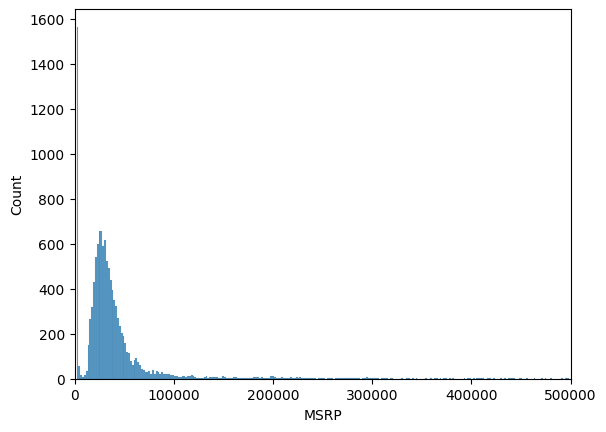

In [32]:
sns.histplot(data['MSRP'])
plt.xlim(0, 500000)

Based on the above histogram, it seems as though the targett variable of MSRP is relatively evenly distributed, though there are some outliers on either side, and seemingly a significant number of outliers on the left side.

### Relationships Between Features:
- Are there correlations between the numerical variables?

- Are there features that are highly correlated (positively or negatively)?
- How does each feature correlate with the target variable?

<Axes: >

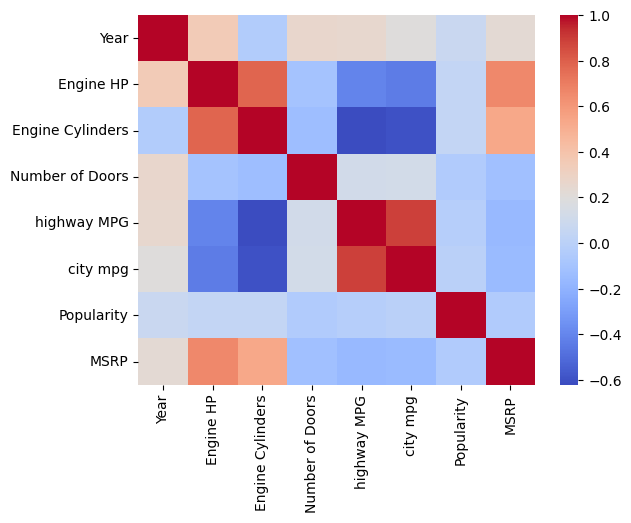

In [33]:
sns.heatmap(data.select_dtypes('number').corr(), cmap='coolwarm')

Based on the above heatmap of the correlation values between all the numeric variables, there seems to be quite a bit of correlation between certain variables. For example, there are strong negative correlations between variables such as engine cylinders and highway/city mpg, and other slightly less strong negative correlations. This heatmap also shows a strong positive correlation between the target variable of MSRP and engine cylinders and engine hp.

### Are there any potential outliers in the dataset?
- Use boxplots or scatter plots to identify potential outliers.
- Should outliers be removed or dealt with in some other way?

/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future ve

<Axes: >

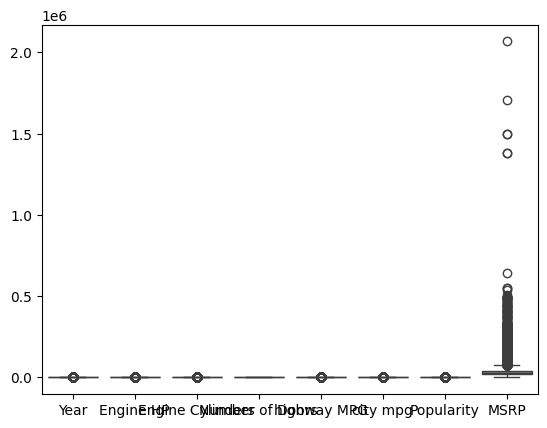

In [34]:
sns.boxplot(data=data.select_dtypes('number'))

There do seem to be outliers, particularly in the target variable of MSRP, and in order not to bias the model too much toward these larger values, it may be best to trim some of them as we do below with the IQR method.

In [35]:
Q1 = data['MSRP'].quantile(0.25)
Q3 = data['MSRP'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
data = data[(data['MSRP'] >= lower_bound) & (data['MSRP'] <= upper_bound)]

### Data Cleaning:
- Are there any issues in the data that need to be cleaned?

- Are there duplicated rows that should be removed?

In [36]:
data.duplicated().sum()

704

There are 715 duplicate rows, so it would be reasonable to drop those as we will do in the next sell. There are also some other issues in the dataset, such as a number of missing values, but these can be handled using imputation so they are not as pressing at the moment.

In [37]:
data.drop_duplicates(inplace=True)

<ipython-input-37-515f69ef7765>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data.drop_duplicates(inplace=True)


### Split into features and target

In [38]:
X = data.drop('MSRP', axis=1)
y = data['MSRP']

### Feature Engineering

In [39]:
# Identify numerical and categorical columns
numerical_features = X.select_dtypes(include=['number']).columns
categorical_features = X.select_dtypes(include=['object']).columns

### Preprocessing Pipelines

In [40]:
# Preprocessing pipeline for numerical features
numerical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='mean')),  # Handle missing values
    ('scaler', StandardScaler())  # Standardize features
])

# Preprocessing pipeline for categorical features
categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),  # Handle missing values
    ('onehot', OneHotEncoder(handle_unknown='ignore'))  # One-hot encoding
])

# Combine preprocessing for both numerical and categorical features
preprocessor = ColumnTransformer(transformers=[
    ('num', numerical_transformer, numerical_features),
    ('cat', categorical_transformer, categorical_features)
])




### Create a function to build and evaluate models using pipelines

In [41]:
def evaluate_model(model, X_train, X_test, y_train, y_test):
    # Fit the model
    model.fit(X_train, y_train)

    # Predict on test set
    y_pred = model.predict(X_test)

    # Evaluation metrics
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)

    print(f"Model: {model.named_steps['model'].__class__.__name__}")
    print(f"Mean Squared Error: {mse:.4f}")
    print(f"R² Score: {r2:.4f}")
    print('-' * 50)

In [42]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

### Model pipelines

In [43]:
# Linear Regression Pipeline
linear_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('model', LinearRegression())
])

# Ridge Regression Pipeline
ridge_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('model', Ridge(alpha=1.0))
])

# Lasso Regression Pipeline
lasso_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('model', Lasso(alpha=0.1))
])

# Stochastic Gradient Descent (SGD) Pipeline
sgd_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('model', SGDRegressor(max_iter=1000, tol=1e-3))
])
# Polynomial Regression Pipeline (degree=2)
polynomial_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('poly', PolynomialFeatures(degree=2)),
    ('model', LinearRegression())
])



### Evaluate all models

In [ ]:
for model in [linear_pipeline, ridge_pipeline, lasso_pipeline, sgd_pipeline, polynomial_pipeline]:
    evaluate_model(model, X_train, X_test, y_train, y_test)

Model: LinearRegression
Mean Squared Error: 12393321.4797
R² Score: 0.9510
--------------------------------------------------
Model: Ridge
Mean Squared Error: 13173233.9744
R² Score: 0.9479
--------------------------------------------------


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:658: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 25361975567.070194, tolerance: 201923019.02761972
  model = cd_fast.sparse_enet_coordinate_descent(


Model: Lasso
Mean Squared Error: 12290748.0759
R² Score: 0.9514
--------------------------------------------------
Model: SGDRegressor
Mean Squared Error: 15593062.4364
R² Score: 0.9383
--------------------------------------------------


### Interpretation:
Discuss the effectiveness of each model. Which model performed the best and why?

The linear model performs reasonably well, especially as the outliers have been cleaned and the distribution of the target variable is relatively normal. \\
The Ridge model also performs well though slightly less accurate. \\
The Lasso model also performs quite well, likely due to the data being relatively colinear and related in multiple areas. \\
The polynomial model performed incredibly badly, likely because the distribution of data was not a good fit for the chosen degree. \\
Based on the statistics, the lasso model performed the best, with the lowest mean squared error and the highest r2 score.

### Submission Requirements:

Submit your Jupyter notebook with the code for all models on Moodle using Github.
Include clear markdown cells explaining your approach, observations from EDA, preprocessing steps, and a detailed discussion of the results.